# Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import plotly.express as px

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot

# importing data

In [6]:
raw_dataset = pd.read_csv('./kidney_disease.csv')

dataframe = pd.DataFrame(raw_dataset)

In [7]:
dataframe.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


# Formating datatype

In [8]:
np.random.seed(42)

dataframe.drop('id', axis = 1, inplace = True)

dataframe.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']


In [9]:
dataframe['packed_cell_volume'] = pd.to_numeric(dataframe['packed_cell_volume'], errors='coerce')
dataframe['white_blood_cell_count'] = pd.to_numeric(dataframe['white_blood_cell_count'], errors='coerce')
dataframe['red_blood_cell_count'] = pd.to_numeric(dataframe['red_blood_cell_count'], errors='coerce')

cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'object']
num_cols = [col for col in dataframe.columns if dataframe[col].dtype != 'object']

#EDA

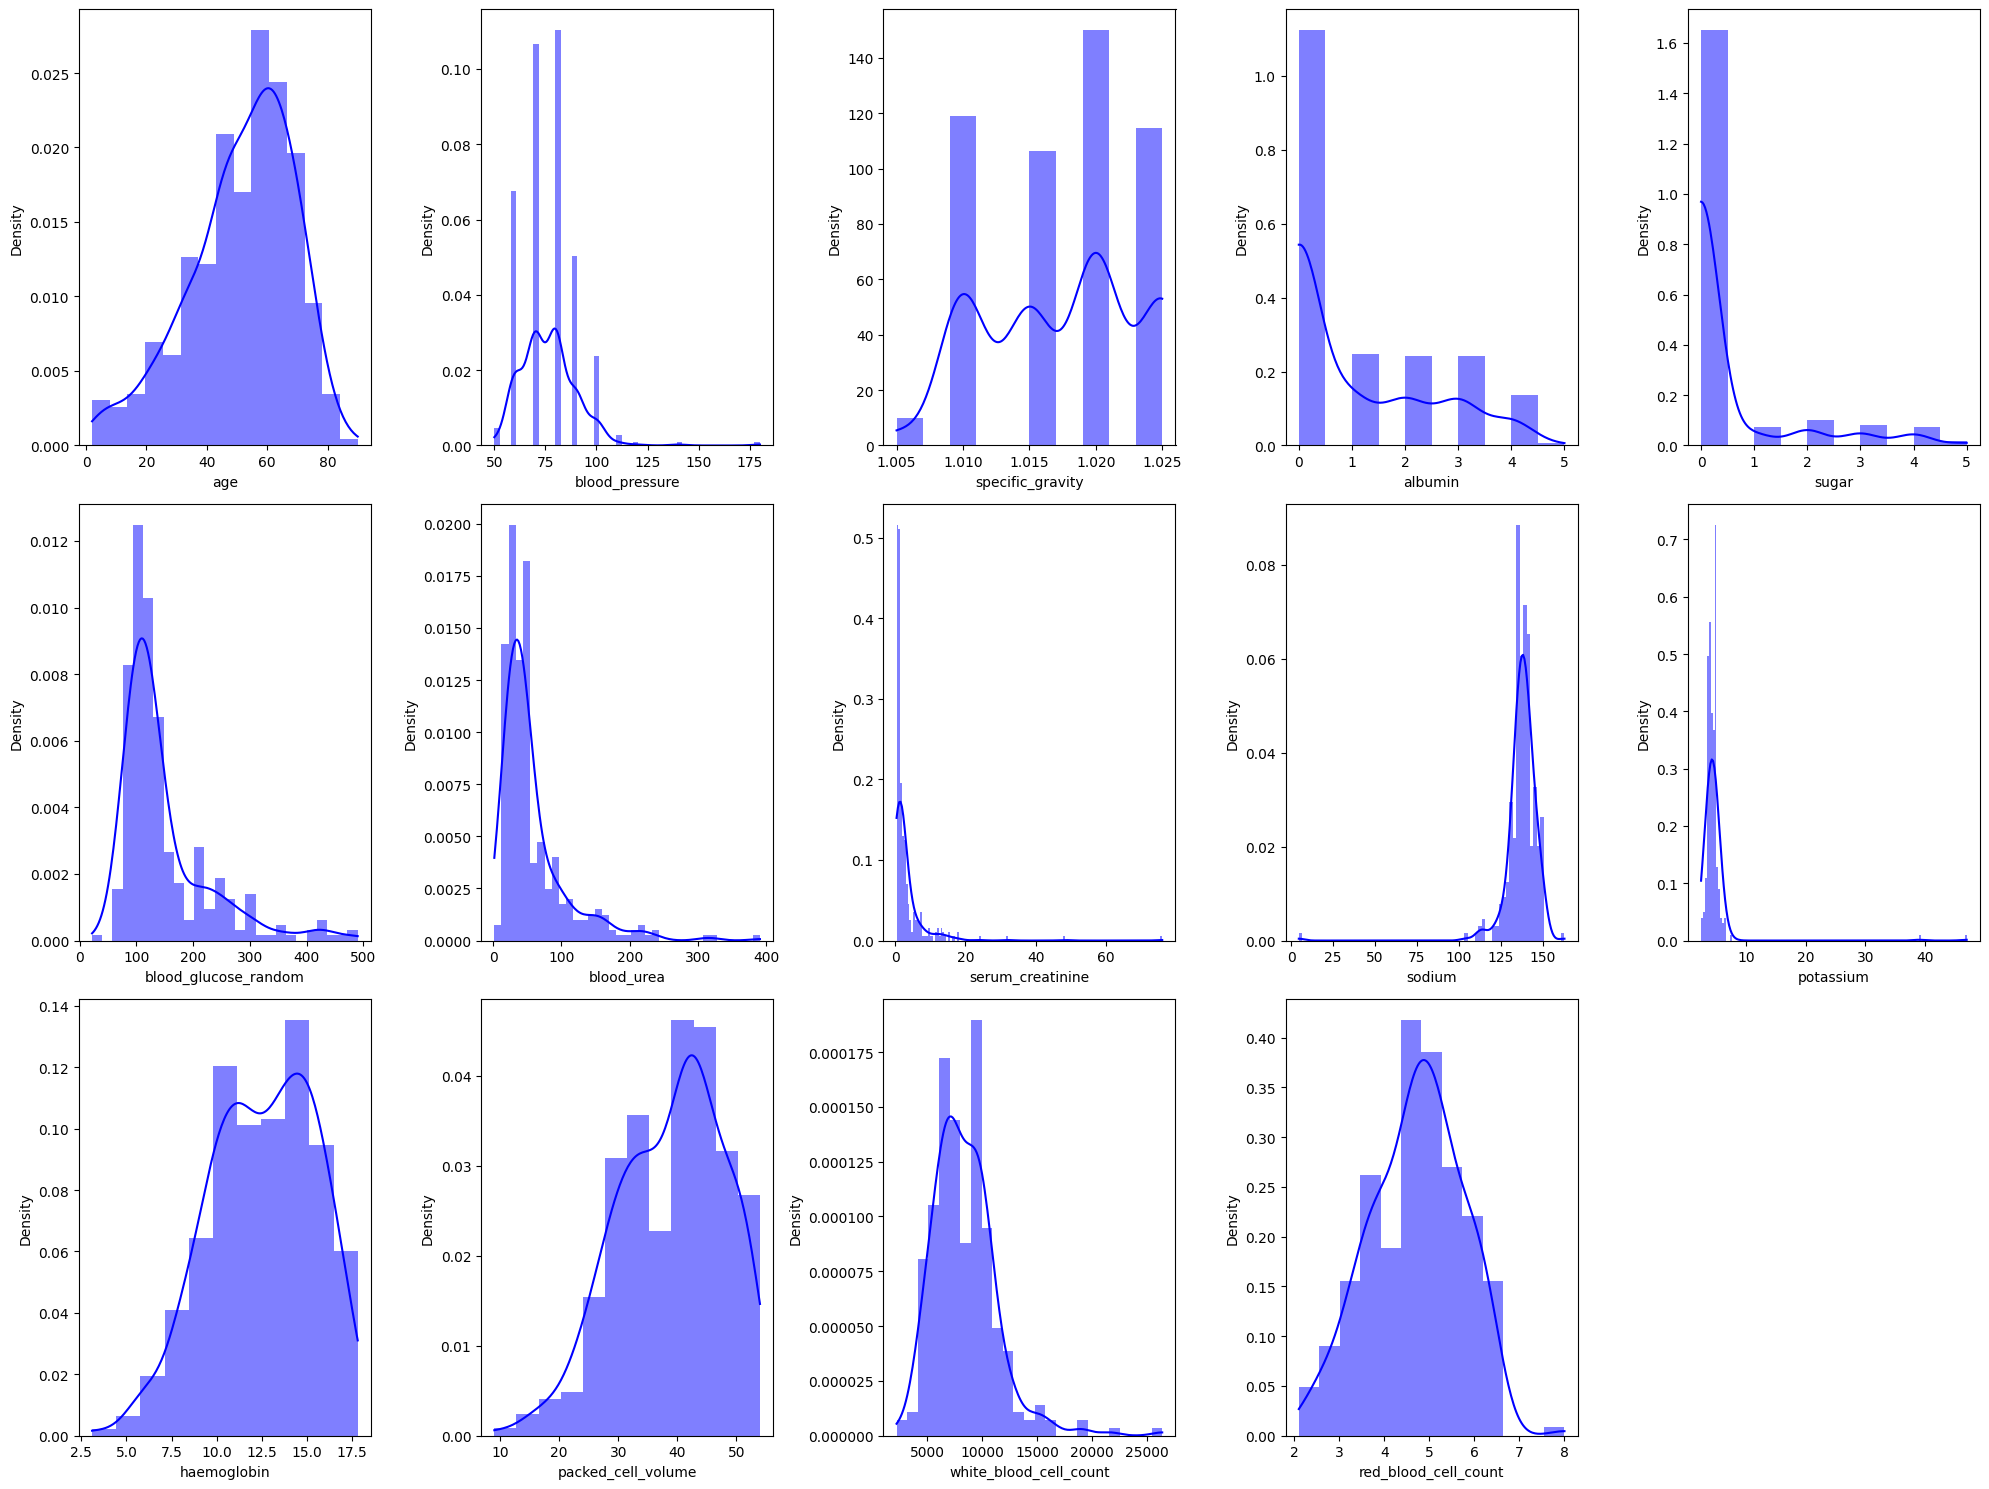

In [10]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot (dataframe[column],color='blue',kde=True, stat="density", linewidth=0)
        plt.xlabel(column)


    plotnumber += 1

plt.tight_layout()
plt.show()

<ipython-input-11-6f90f7d80c8e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = dataframe[column], palette = 'deep',color='black')
<ipython-input-11-6f90f7d80c8e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = dataframe[column], palette = 'deep',color='black')
<ipython-input-11-6f90f7d80c8e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = dataframe[column], palette = 'deep',color='black')
<ipython-input-11-6f90f7d80c8e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

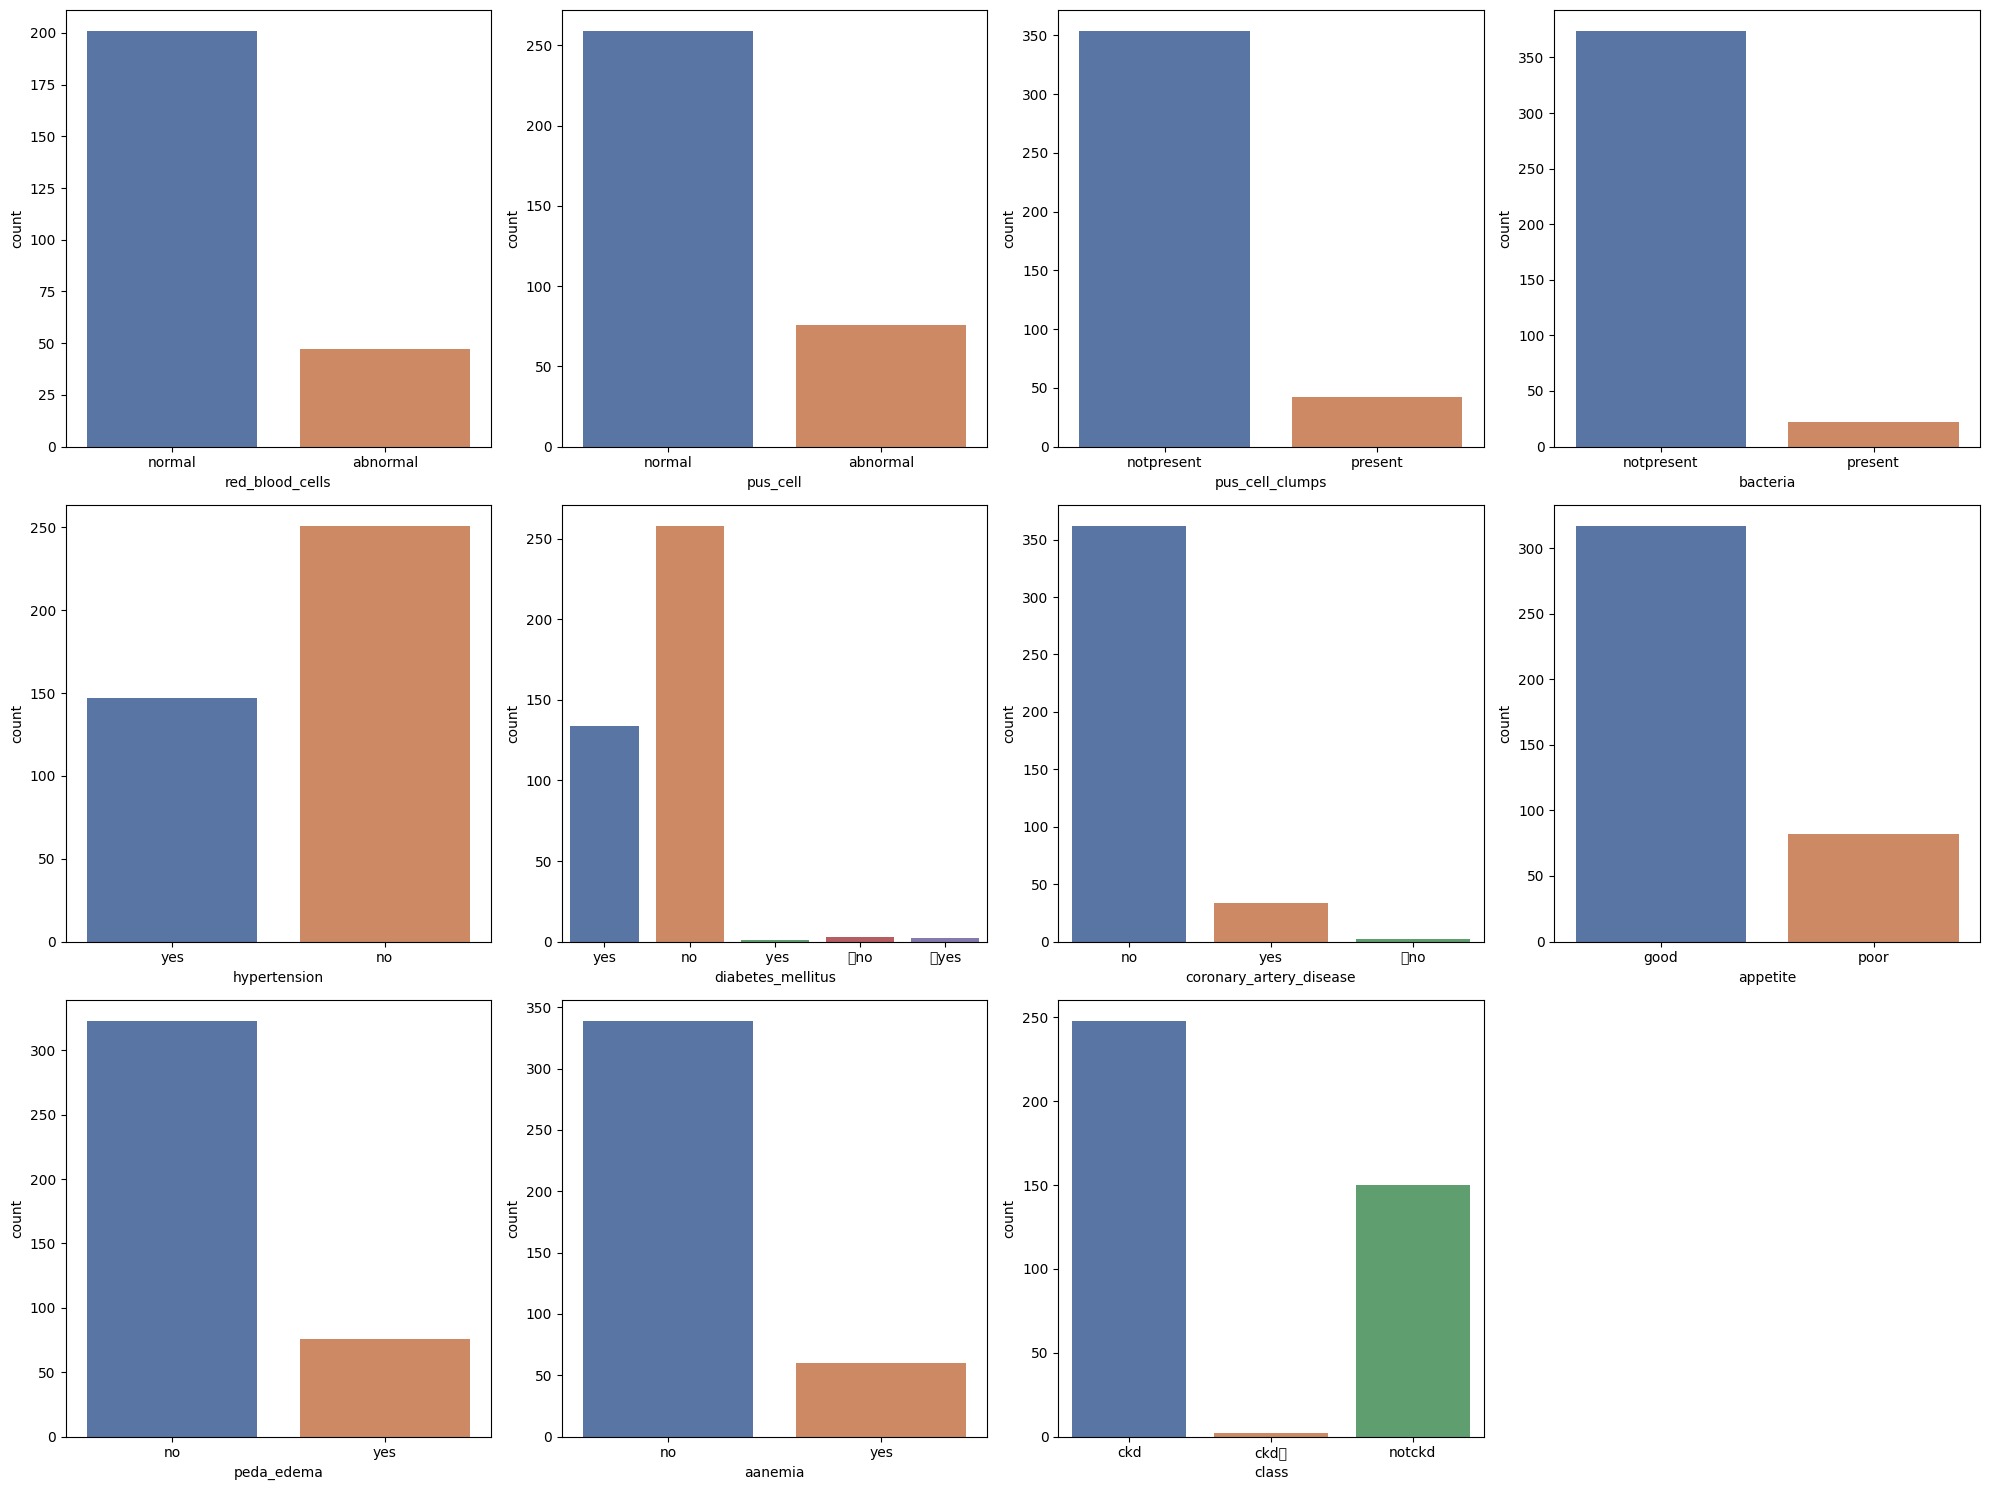

In [11]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(x = dataframe[column], palette = 'deep',color='black')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

#Data Preprocessing

In [12]:
raw_dataset = pd.read_csv('/content/kidney_disease.csv')

data = pd.DataFrame(raw_dataset)

In [13]:
data.shape

(400, 26)

In [14]:
data.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [15]:
# Convert mis-typed numeric columns
for col in ['pcv', 'wc', 'rc']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill numeric columns
for col in ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']:
    data[col].fillna(data[col].median(), inplace=True)

# Fill categorical columns
for col in ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']:
    data[col].fillna(data[col].mode()[0], inplace=True)


<ipython-input-15-2d5a6e85beb0>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-15-2d5a6e85beb0>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [16]:
data.isnull().sum()

,0
id,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0


In [17]:
data.duplicated().sum()


np.int64(0)

In [18]:
data_cleaned = data.drop_duplicates()

In [19]:
data_cleaned.shape

(400, 26)

In [20]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

In [21]:
data_cleaned.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
binary_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'pe', 'ane', 'appet']

for col in binary_cols:
    print(f"Unique values in '{col}' BEFORE encoding:")
    print(data_cleaned[col].unique())
    print()

Unique values in 'rbc' BEFORE encoding:
['normal' 'abnormal']

Unique values in 'pc' BEFORE encoding:
['normal' 'abnormal']

Unique values in 'pcc' BEFORE encoding:
['notpresent' 'present']

Unique values in 'ba' BEFORE encoding:
['notpresent' 'present']

Unique values in 'htn' BEFORE encoding:
['yes' 'no']

Unique values in 'dm' BEFORE encoding:
['yes' 'no' ' yes' '\tno' '\tyes']

Unique values in 'cad' BEFORE encoding:
['no' 'yes' '\tno']

Unique values in 'pe' BEFORE encoding:
['no' 'yes']

Unique values in 'ane' BEFORE encoding:
['no' 'yes']

Unique values in 'appet' BEFORE encoding:
['good' 'poor']



# Feature Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
binary_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'pe', 'ane', 'appet','classification']

for col in binary_cols:
    data_cleaned[col] = le.fit_transform(data_cleaned[col])


In [24]:
data_cleaned.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.2,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,4.8,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.8,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,3,1,0,0,0,0


# Splitting  Dataset

In [25]:
from sklearn.model_selection import train_test_split

X = data_cleaned.drop('classification', axis=1)
y = data_cleaned['classification']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=42)


# Training Models

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
clf_rand_forest = RandomForestClassifier()
clf_rand_forest.fit(X_train_scaled, Y_train)

# SVM
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(X_train_scaled, Y_train)

# Naive Bayes
clf_gnb = GaussianNB()
clf_gnb.fit(X_train_scaled, Y_train)

# Logistic Regression
clf_log = LogisticRegression(solver='lbfgs', max_iter=5000)
clf_log.fit(X_train_scaled, Y_train)

# KNN
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train_scaled, Y_train)

# XGBoost
clf_xgb = XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.5,
    max_depth=5,
    n_estimators=150,
    eval_metric='mlogloss'
)
clf_xgb.fit(X_train_scaled, Y_train)

# Decision Tree
clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(X_train_scaled, Y_train)

# AdaBoost
clf_ada = AdaBoostClassifier(estimator=clf_dtc)
clf_ada.fit(X_train_scaled, Y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier())

# Evaluation

### Random Forest

#### Classification Report

In [27]:
Y_pred = clf_rand_forest.predict(X_test)

rand_forest_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85       102
           2       0.68      1.00      0.81        58

    accuracy                           0.83       160
   macro avg       0.84      0.87      0.83       160
weighted avg       0.88      0.83      0.83       160



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [28]:

mean_absolute_error(Y_test,Y_pred)

0.3375

#### Root Mean Square Error

In [29]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE:", rmse)


RMSE: 0.8215838362577492


### SVM

#### Classification Report

In [36]:
Y_pred = clf_svm.predict(X_test)

svm_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       102
           2       0.00      0.00      0.00        58

    accuracy                           0.64       160
   macro avg       0.32      0.50      0.39       160
weighted avg       0.41      0.64      0.50       160



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

#### Mean Absolute Error

In [37]:
mean_absolute_error(Y_test,Y_pred)

0.725

#### Root Mean Square Error

In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE:", rmse)

RMSE: 1.2041594578792296


### Naive Bayes

#### Classification Report

In [39]:
Y_pred = clf_gnb.predict(X_test)

gnb_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       102
           2       0.00      0.00      0.00        58

    accuracy                           0.64       160
   macro avg       0.32      0.50      0.39       160
weighted avg       0.41      0.64      0.50       160



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `

#### Mean Absolute Error

In [40]:

mean_absolute_error(Y_test,Y_pred)

0.725

#### Root Mean Square Error

In [41]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE:", rmse)


RMSE: 1.2041594578792296


### Logistic Regression

#### Classification Report

In [42]:
Y_pred = clf_log.predict(X_test)

log_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.65      0.99      0.79       102
           2       0.80      0.07      0.13        58

    accuracy                           0.66       160
   macro avg       0.73      0.53      0.46       160
weighted avg       0.71      0.66      0.55       160



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


#### Mean Absolute Error

In [43]:

mean_absolute_error(Y_test,Y_pred)

0.6875

#### Root Mean Square Error

In [44]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE:", rmse)


RMSE: 1.1726039399558574


### KNN

#### Classification Report

In [46]:
Y_pred = clf_knn.predict(X_test)

knn_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       102
           2       0.00      0.00      0.00        58

    accuracy                           0.64       160
   macro avg       0.32      0.50      0.39       160
weighted avg       0.41      0.64      0.50       160



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samp

#### Mean Absolute Error

In [47]:

mean_absolute_error(Y_test,Y_pred)

0.725

### XG_Boost

#### Classification Report

In [48]:
Y_pred = clf_xgb.predict(X_test)

xgb_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       102
           2       0.36      1.00      0.53        58

    accuracy                           0.37       160
   macro avg       0.68      0.50      0.28       160
weighted avg       0.77      0.37      0.21       160



#### Mean Absolute Error

In [49]:

mean_absolute_error(Y_test,Y_pred)

1.2625

#### Root Mean Square Error

In [50]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE:", rmse)


RMSE: 1.5890248582070703


### Decision Tree

#### Classification Report

In [51]:
Y_pred = clf_dtc.predict(X_test)

dtc_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       102
           2       0.36      1.00      0.53        58

    accuracy                           0.37       160
   macro avg       0.68      0.50      0.28       160
weighted avg       0.77      0.37      0.21       160



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


#### Mean Absolute Error

In [52]:
mean_absolute_error(Y_test,Y_pred)

1.2625

#### Root Mean Square Error

In [53]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE:", rmse)


RMSE: 1.5890248582070703


### Ada Boost

#### Classification Report

In [54]:
Y_pred = clf_ada.predict(X_test)

ada_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       102
           2       0.36      1.00      0.53        58

    accuracy                           0.37       160
   macro avg       0.68      0.50      0.28       160
weighted avg       0.77      0.37      0.21       160



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


#### Mean Absolute Error

In [55]:

mean_absolute_error(Y_test,Y_pred)

1.2625

#### Root Mean Square Error

In [56]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE:", rmse)


RMSE: 1.5890248582070703


In [58]:
Y_pred = clf_svm.predict(X_test)

svm_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       102
           2       0.00      0.00      0.00        58

    accuracy                           0.64       160
   macro avg       0.32      0.50      0.39       160
weighted avg       0.41      0.64      0.50       160



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

# Model Comparison

In [59]:
models = pd.DataFrame({
    'Model' : [ 'Random Forest Classifier', 'SVM Classifier', 'Naive Bayes Classifier','KNN Classifier',
             'XG_Boost Classifier', 'Decision Tree Classifier', 'Ada_Boost Classifier'],
    'Score' : [rand_forest_acc, svm_acc, gnb_acc, knn_acc, xgb_acc, dtc_acc, ada_acc]
})


sorted_models = models.sort_values(by = 'Score', ascending = True)

fig = px.bar(data_frame = sorted_models, x = 'Score', y = 'Model',
       title = 'Models Comparison')

fig.show()